# Programación 201

# NBA player of the week

### Ejercicio 1

# Descripción y enunciado
El objetivo de esta actividad es la gestión y preparación de datos. La gestión de datos es una parte muy importante de cualquier proceso de minería de datos, ya que los datos se deben preparar y preprocesar antes de iniciar el proceso de extracción de conocimiento.
Esta tarea ilustra algunos de los procedimientos básicos con los que nos podemos encontrar para preparar los datos: analizar los tipos de datos, tranformar valores, detectar e eliminar outliers, hacer un muestreo, etcétera.

# Fichero de datos
El conjunto de datos con el que trabajaremos en esta actividad surge de la bases de datos disponibles en Kaggle . En concreto, los datos corresponden a los jugadores nombrados jugadores de la semana desde la temporada 1984-1985 hasta la temporada 2017-2018. Estos datos nos ofrecen múltiples posibilidades para consolidar los conocimientos y competencias de manipulación de datos, preprocesado y análisis descriptivo. El fichero `NBA_player_of_the_week.csv` se encuentra adjunto.


# Ingesta de datos
Actualmente el fichero se encuentra en la misma carpeta de datos RMD, está en adjunto. Se enviará nueva práctica similar con los datos de ingesta a través de scraping / API / base de datos para R y Python.


# Valoraciones
 - se valorarán los trabajos por los detalles, no vale con el solo enviar un trozo de código, sino la explicación es fundamental
 - explicar además los resumen de cada sección (carga, preparación, EDA, limpieza, nuevos atributos, discretización, split train-test)
 - conclusiones y comparativas son los más importantes para comenzar con Data Mining.



In [46]:
import pandas as pd
import numpy as np
import seaborn as sns

###  1 Cargar un juego de datos
* Leer el fichero de datos “NBA_player_of_the_week.csv” y guardar los datos en un objeto con identificador denominado nba.*

In [47]:
NBA = pd.read_csv('NBA_player_of_the_week.csv')

### 2 Descripción de los datos
* Describir brevemente la estructura de los datos: qué tipo de datos contiene, número de filas y columnas y nombre de las columnas. Realizar un resumen descriptivo de los datos.*

In [48]:
# Nombre de columnas
NBA.columns

Index(['Age', 'Conference', 'Date', 'Draft Year', 'Height', 'Player',
       'Position', 'Season', 'Season short', 'Seasons in league', 'Team',
       'Weight', 'Real_value'],
      dtype='object')

In [49]:
# Tamaño del dataframe
NBA.shape

(1145, 13)

In [50]:
# Caracteristicas del dataframe
NBA.dtypes

Age                    int64
Conference            object
Date                  object
Draft Year             int64
Height                object
Player                object
Position              object
Season                object
Season short           int64
Seasons in league      int64
Team                  object
Weight                object
Real_value           float64
dtype: object

In [51]:
### Primeras 5 lineas
NBA.head(5)

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
0,29,NaN,"Apr 14, 1985",1978,6-5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0
1,23,NaN,"Apr 7, 1985",1982,6-6,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
2,28,NaN,"Apr 1, 1985",1979,6-6,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0
3,37,NaN,"Mar 24, 1985",1969,7-2,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
4,28,NaN,"Mar 17, 1985",1978,6-9,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0


### 3 Preparación de la base de datos
#### 3.1 Asignar NA a los valores ausentes en los datos de `Conference`.


In [52]:
NBA['Conference'].unique()

array([nan, 'East', 'West'], dtype=object)

In [53]:
## Damos por hecho que los equipos siempre han estado en la misma conferencia, así que creamos un dataframe con 
##conferencia y equipo, elimino los valores en blanco y después los duplicados para tener los datos sólo una vez

NBATEAMS = NBA[NBA['Conference'].isna()==False][['Conference','Team']].drop_duplicates()
NBA.drop('Conference',axis=1, inplace = True)

NBA = pd.merge(NBA,NBATEAMS,how='left', on = 'Team')


In [54]:
# Reviso los equipos NA que quedan.
NBA[NBA['Conference'].isna()][['Team']].value_counts()

Team              
Washington Bullets    8
dtype: int64

In [55]:
# Reviso la conferencia en la que están los otros equipos de Washington
NBATEAMS[NBATEAMS['Team'].str.contains('Washington')]

,Conference,Team
414,East,Washington Wizards


In [56]:
# Asigno a los equipos conequipo `Washington Bullets` la conferencia Oeste
NBA.loc[NBA['Conference'].isna(),'Conference'] = 'East'

In [57]:
# Reviso que no queden datos en blanco
NBA['Conference'].unique()

array(['East', 'West'], dtype=object)

#### 3.2 Transformar los datos de Conference en variable categórica y mostrar la tabla de frecuencia.

In [58]:
NBA['Conference'].astype('category')

0       East
1       West
2       East
3       West
4       West
        ... 
1179    West
1180    East
1181    West
1182    East
1183    West
Name: Conference, Length: 1184, dtype: category
Categories (2, object): ['East', 'West']

In [59]:
## Reviso que sea variable categórica
NBA['Conference'].dtypes

dtype('O')

In [60]:
# Tabla de frecuencias
NBA['Conference'].value_counts()

East    593
West    591
Name: Conference, dtype: int64

#### 3.4 Transformar las variables Height, Player, Position, Season, Team y Weight en variables categóricas.

In [61]:
Vartofact = ('Height' , 'Player' , 'Position' , 'Season' , 'Team' , 'Weight')
for var in Vartofact:
    NBA[var].astype('category')
    print('{}: '.format(var) + str(NBA[var].dtypes) )
    

Height: object
Player: object
Position: object
Season: object
Team: object
Weight: object


#### 3.5 Comprobar que estas variables no tienen valores perdidos.

In [62]:
#Comprobacion de valores nulos
Vartofact = ('Height' , 'Player' , 'Position' , 'Season' , 'Team' , 'Weight')
for var in Vartofact:
     print('{}: '.format(var) + str(NBA[var].isnull().sum()) )

Height: 0
Player: 0
Position: 0
Season: 0
Team: 0
Weight: 0


In [63]:
#Comprobacion de infinitos
Vartofact = ('Height' , 'Player' , 'Position' , 'Season' , 'Team' , 'Weight')
for var in Vartofact:
     print('{}: '.format(var) + str(NBA[var].isna().sum()) )

Height: 0
Player: 0
Position: 0
Season: 0
Team: 0
Weight: 0


#### 3.6 Calcular el número de anyos que pasan entre que salio el jugador elegido en el draft y la temporada en la que fue jugador de la semana. Denomina la variable tiempo.

In [64]:
NBA['Tiempo'] = NBA['Season short']-NBA['Draft Year']

#### 3.7 ¿Cual es el número de años que más veces se repite entre que salen elegidos en el draft y se proclaman mejores jugadores? (moda de la variable tiempo)

In [65]:
NBATIEMPO = pd.DataFrame(NBA['Tiempo'].value_counts())
NBATIEMPO[NBATIEMPO['Tiempo']==NBATIEMPO['Tiempo'].max()]

,Tiempo
7,148


#### 3.8 La altura de los jugadores está expresada en pies (aquellas con guión) y cm. Convertir la altura expresada en pies a centimetros [https://www.piesametros.info/](https://www.piesametros.info/). Posteriormente, eliminar el texto “cm” de los datos de tipo altura y convertir la variable en numérica. Calcular media, desviación típica y boxplot.

In [66]:
## Creo dos Dataframes, uno con CM y otro con pies posteriormente hago un calculo para comprobar que todas las líneas están incluidas.

DF_CM = NBA[NBA['Height'].str.contains('-')==False]
DF_CM['Height'] = DF_CM['Height'].str.replace('cm','')

## En esta operación selecciono las filas con altura en sistema imperial (SI), separo la variable altura en 2, pies y pulgadas y 
## procedo a calcular la altura en sistema metrico, posteriormente elimino las columnas pies y pulgadas

DF_FT = NBA[NBA['Height'].str.contains('-')]
FT = DF_FT['Height'].str.split("-",n=1, expand=True) ## Separo el campo altura en pies y pulgadas
FT.rename(columns= {0:'Pies', 1:'Pulgadas'},inplace = True) # renombro las columans del dataframe
FT['Pies'] = FT['Pies'].astype('int') ## Convierto en numero
FT['Pulgadas'] = FT['Pulgadas'].astype('int') ## convierto en numero
FT['Height'] = FT['Pies']*30.48 +FT['Pulgadas']*2.54 ## Calculo la altura en CM
DF_FT.drop(['Height'],axis=1, inplace=True) ## Me cargo el campo Height para poder poner el campo calculado en su lugar
DF_FT = pd.concat([DF_FT, FT['Height']], axis=1) ## Uno el nuevo campo
NBA = pd.concat([DF_FT, DF_CM]) ## Uno los DF con los datos modificados


<ipython-input-66-88d45343343b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_CM['Height'] = DF_CM['Height'].str.replace('cm','')
c:\users\jd\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### 3.9 El peso de los jugadores está expresada en libras y kg. Convertir el peso expresado en kgs en libras [https://www.metric-conversions.org/es/peso/kilogramos-a-libras.htm](https://www.metric-conversions.org/es/peso/kilogramos-a-libras.htm). Convertir la variable en numérica.Calcular media, desviación típica y boxplot.

In [67]:
## Opero de forma similar al caso anterior

DF_KG = NBA[NBA['Weight'].str.contains('kg')]
DF_KG['Weight'] = DF_KG['Weight'].str.replace('kg','')
DF_KG['Weight'] = DF_KG['Weight'] *2.20

<ipython-input-67-dee194edb9c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_KG['Weight'] = DF_KG['Weight'].str.replace('kg','')


TypeError: can't multiply sequence by non-int of type 'float'

In [68]:
DF_LB = NBA[NBA['Weight'].str.contains('kg')==False]
DF_LB['Weight'] = DF_LB['Weight'].astype('int')

<ipython-input-68-13d46607a220>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_LB['Weight'] = DF_LB['Weight'].astype('int')


In [69]:
NBA = pd.concat([DF_LB,DF_KG])

In [70]:
NBA

,Age,Date,Draft Year,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value,Conference,Tiempo,Height
0,29,"Apr 14, 1985",1978,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0,East,7,195.58
1,23,"Apr 7, 1985",1982,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0,West,3,198.12
2,23,"Apr 7, 1985",1982,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0,East,3,198.12
3,28,"Apr 1, 1985",1979,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0,West,6,198.12
4,37,"Mar 24, 1985",1969,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0,West,16,218.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,28,"Nov 6, 2017",2009,James Harden,SG,2017-2018,2018,8,Houston Rockets,100,0.5,West,9,196
1180,25,"Oct 30, 2017",2013,Victor Oladipo,G,2017-2018,2018,4,Indiana Pacers,95,0.5,East,5,193
1181,27,"Oct 30, 2017",2010,DeMarcus Cousins,C,2017-2018,2018,7,New Orleans Pelicans,122,0.5,West,8,211
1182,23,"Oct 23, 2017",2013,Giannis Antetokounmpo,F,2017-2018,2018,4,Milwaukee Bucks,101,0.5,East,5,211


# 4 Información sobre posiciones en el campo y equipos.
#### 4.1 Fusionar las categorias de posición en el campo F,F-C y FC en la categoría genérica Forward. Fusionar las categorias G,G-F y GF en la categoria genérica Guard. Renombrar la categoría ‘PG’ como ‘Point Guard’, ‘SG’ como ‘Shooting Guard’, ‘SF’ como ‘Small Forward’, ‘PF’ como ‘Power Forward’ y ‘C’ como ‘Center’.

In [71]:
NBA.loc[(NBA['Position']=='F') | (NBA['Position']=='F-C') | (NBA['Position']=='FC'),'Position'] = 'Forward'
NBA.loc[(NBA['Position']=='G') | (NBA['Position']=='GF'),'Position'] = 'Guard'
NBA.loc[NBA['Position']=='PG','Position'] = 'Point Guard'
NBA.loc[NBA['Position']=='SG','Position'] = 'Shooting Guard'
NBA.loc[NBA['Position']=='SF','Position'] = 'Small Forward'
NBA.loc[NBA['Position']=='PF','Position'] = 'Power Forward'
NBA.loc[NBA['Position']=='C','Position'] = 'Center'

In [72]:
NBA['Position'].unique()

array(['Point Guard', 'Shooting Guard', 'Forward', 'Center',
       'Small Forward', 'Power Forward', 'Guard', 'G-F'], dtype=object)

#### 4.2 ¿En que posición ha sido más veces los jugadores de la semana nombrados?

In [73]:
NBAPOSITION = pd.DataFrame(NBA['Position'].value_counts())
NBAPOSITION[NBAPOSITION['Position']==NBAPOSITION['Position'].max()]

,Position
Guard,230


#### 4.3 ¿Cuántos equipos distintos hay?

In [74]:
len(NBA['Team'].unique())

35

#### 4.4 ¿Cuáles son los cinco equipos que más veces han sido nombrados sus jugadores como jugador de la semana?

In [75]:
NBATEAM = pd.DataFrame(NBA['Team'].value_counts())
NBATEAM.iloc[0:5]

,Team
Los Angeles Lakers,71
San Antonio Spurs,61
Cleveland Cavaliers,59
Miami Heat,57
Houston Rockets,56


# 5 Información sobre jugadores. Estadísticos descriptivos.

#### 5.1 Crear una base datos denominada nba.unique en la que no se repita el nombre de ningún jugador.Trabajar a partir de ahora con esta base de datos.

In [76]:
Players = NBA[['Player','Draft Year','Height','Position','Weight']].drop_duplicates(subset='Player')

#### 5.2 Listar el nombre de los 10 jugadores más bajos que han sido nombrados alguna vez jugadores de la semana. No debe repetirse ningún nombre.

In [77]:
Players.iloc[1:10].sort_values(by='Height',ascending=True)

,Player,Draft Year,Height,Position,Weight
7,Sleepy Floyd,1982,190.5,Point Guard,170
6,Darrell Griffith,1980,193.04,Shooting Guard,190
1,Derek Smith,1982,198.12,Shooting Guard,205
3,Calvin Natt,1979,198.12,Forward,220
8,Mark Aguirre,1981,198.12,Small Forward,232
10,Dominique Wilkins,1982,200.66,Small Forward,200
5,Larry Bird,1978,205.74,Small Forward,220
9,Magic Johnson,1979,205.74,Point Guard,255
4,Kareem Abdul-Jabbar,1969,218.44,Center,225


#### 5.3 Listar el nombre de los 10 jugadores más altos que han sido nombrados y mostrar su altura. No debe repetirse ningún nombre.

In [78]:
Players.iloc[1:10].sort_values(by='Height',ascending=False)

,Player,Draft Year,Height,Position,Weight
4,Kareem Abdul-Jabbar,1969,218.44,Center,225
5,Larry Bird,1978,205.74,Small Forward,220
9,Magic Johnson,1979,205.74,Point Guard,255
10,Dominique Wilkins,1982,200.66,Small Forward,200
1,Derek Smith,1982,198.12,Shooting Guard,205
3,Calvin Natt,1979,198.12,Forward,220
8,Mark Aguirre,1981,198.12,Small Forward,232
6,Darrell Griffith,1980,193.04,Shooting Guard,190
7,Sleepy Floyd,1982,190.5,Point Guard,170


# 6 Eliminación de outliers.

#### 6.1 Eliminar los outliers de la variable peso (Weight) y guardar en un data frame nba.avg

<AxesSubplot:ylabel='Weight'>

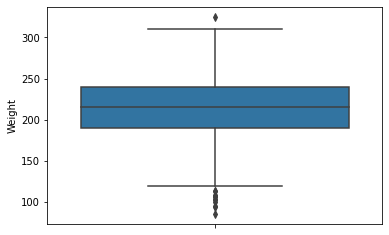

In [79]:
import seaborn as sns
import numpy as np
Players['Weight'] = pd.to_numeric(Players['Weight'], downcast='float') ## convierto en numerico
sns.boxplot(y=Players['Weight'])


In [80]:
# Calculo los outliers
import numpy as np
Q1,Q3= np.percentile(Players['Weight'],[25,75]) ##Calculo los Q1 y Q2
IQR = Q3-Q1
OLBajo = Q1 - (1.5*IQR)
OLAlto = Q3 + (1.5*IQR)
Pesossinoutliers = Players[(Players['Weight']>OLBajo )&(Players['Weight']<OLAlto)]['Weight']
Pesossinoutliers

0       189.0
1       205.0
3       220.0
4       225.0
5       220.0
        ...  
1075    208.0
1077    221.0
1085    200.0
1087    279.0
1097    120.0
Name: Weight, Length: 262, dtype: float32

<AxesSubplot:ylabel='Weight'>

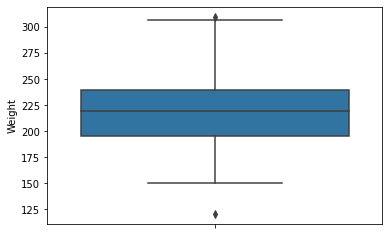

In [81]:
sns.boxplot(y=Pesossinoutliers)

#### 6.2 Comparar los boxplots de los datos originales en nba.unique y de los datos del peso de nba.avg

In [97]:
sns.boxplot(y=Pesossinoutliers,width = 1, ax='1')
sns.boxplot(y=Players['Weight'],width = 1, ax=2)

AttributeError: 'int' object has no attribute 'boxplot'

<AxesSubplot:ylabel='Weight'>

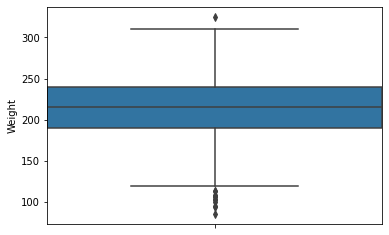

#### 6.3 Interpretar los resultados

In [84]:
NBA['Age'] = NBA['Age'].astype('int')
NBA['Weight'] = NBA['Weight'].astype('int')
NBA['Height'] = NBA['Height'].astype('int')
NBA['Real_value'] = NBA['Real_value'].astype('int')
NBA['Seasons in league'] = NBA['Seasons in league'].astype('int')
NBA['Season short'] = NBA['Season short'].astype('int')
NBA.dtypes

Age                   int32
Date                 object
Draft Year            int64
Player               object
Position             object
Season               object
Season short          int32
Seasons in league     int32
Team                 object
Weight                int32
Real_value            int32
Conference           object
Tiempo                int64
Height                int32
dtype: object

In [85]:
NBA.describe()

,Age,Draft Year,Season short,Seasons in league,Weight,Real_value,Tiempo,Height
count,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000
mean,26.724662,1997.363176,2004.288007,5.831081,216.086149,0.330236,6.924831,200.424831
std,3.391133,9.363597,9.421329,3.260747,45.843030,0.470497,3.280402,9.481722
min,19.000000,1969.000000,1985.000000,0.000000,79.000000,0.000000,1.000000,175.000000
25%,24.000000,1991.000000,1997.000000,3.000000,195.000000,0.000000,4.000000,193.000000
50%,26.000000,1998.000000,2006.000000,5.000000,220.000000,0.000000,7.000000,201.000000
75%,29.000000,2004.000000,2012.000000,8.000000,250.000000,1.000000,9.000000,208.000000
max,40.000000,2016.000000,2018.000000,17.000000,325.000000,1.000000,19.000000,228.000000


# 7 Clasificación de jugadores

#### 7.1 Añadir una columna al conjunto de datos denominada “Altura” que contenga los valores: {“bajo”, “normal”, “alto”}. La asignación del valor depende de la altura de cada jugador. Se asigna:
- bajo: los 50 jugadores más bajos
- alto: los 50 jugadores más altos
- normal: el resto de jugadores

In [86]:
Players['Altura'] = 'Normal'
Players['Height'] = Players['Height'].astype('int')
Players.sort_values(by='Height',ascending=True,inplace=True)
Players.iloc[0:50,-1] = 'Bajo'
Players.sort_values(by='Height',ascending=False,inplace=True)
Players.iloc[0:50,-1] = 'Alto'

In [87]:
Players['Altura'].value_counts()

Normal    174
Alto       50
Bajo       50
Name: Altura, dtype: int64

#### 7.2 Añadir una columna al conjunto de datos denominada “Peso” que contenga los valores: {“bajo”, “normal”, “alto”}. La asignación del valor depende del peso de cada jugador. Se asigna:
- bajo: los 50 jugadores con menor peso
- alto: los 50 jugadores con mayor peso
- normal: el resto de jugadores

In [88]:
Players['Peso'] = 'Normal'
Players['Weight'] = Players['Weight'].astype('int')
Players.sort_values(by='Weight',ascending=True,inplace=True)
Players.iloc[0:50,-1] = 'Bajo'
Players.sort_values(by='Weight',ascending=False,inplace=True)
Players.iloc[0:50,-1] = 'Alto'

In [89]:
Players['Peso'].value_counts()

Normal    174
Alto       50
Bajo       50
Name: Peso, dtype: int64

#### 7.3 Calcular la media y desviación típica del peso (Weight) según la clasificación de altura de los jugadores.

In [90]:
Players[['Peso','Weight']].groupby('Peso').agg(['mean','std'])

Weight           
             mean        std
Peso                        
Alto    262.12000  17.244508
Bajo    159.60000  32.675273
Normal  215.16092  17.152747

#### 7.4 Realizar un boxplot del peso (Weight) según la clasificación de altura del jugador. Los boxplots deben estar ordenados de menos a mayor altura.

In [91]:
## Para ordenar por altura creo esta tabla y compruebo que estábien
Players[['Altura','Height']].groupby('Altura').mean().sort_values(by='Height')

,Height
Altura,
Bajo,185.62000
Normal,200.54023
Alto,212.80000


In [92]:
##Saco solo los indices
OrdenAltura = Players[['Altura','Height']].groupby('Altura').mean().sort_values(by='Height').index
OrdenAltura

Index(['Bajo', 'Normal', 'Alto'], dtype='object', name='Altura')

<AxesSubplot:xlabel='Peso', ylabel='Weight'>

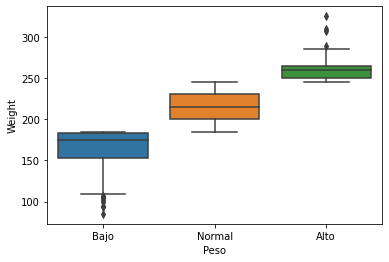

In [93]:
sns.boxplot(data= Players ,y='Weight',x='Peso',order=OrdenAltura)